In [1]:
# import package
import pandas as pd
#import math
import numpy as np
import statsmodels.api as sm
#import statistics
#import plotly.graph_objects as go
from scipy import stats
#from plotly.subplots import make_subplots
#from sklearn.neighbors import KernelDensity
from statsmodels.stats.diagnostic import acorr_ljungbox
import matplotlib.pyplot as plt

## Computing Critical Values

### 1.

In [2]:
simul = np.random.normal(0, 1, (100, 10000))

In [3]:
Y = np.ones((100, 10000))
for j in range(0,10000):
    for i in range(0,100):
        if i < 1:
            Y[i, j] = 0 + simul[i,j]
        else:
            Y[i, j] = Y[i-1, j] + simul[i,j]
            
# Quicker method:            
# for j in range(0,10000):
#     Y[:, j] = np.cumsum(simul[:, 0])

In [4]:
t_value = np.ones(10000)
delta_Y = Y[1:,:] - Y[:-1, :]

for i in range(0, 10000):
    variables = Y[:-1,i].reshape(99, 1)
    x = sm.add_constant(variables)
    y = delta_Y[:, i]

    reg1 = sm.OLS(endog = y, exog = x, missing = 'drop')
    results = reg1.fit()
    t_value[i] = results.tvalues[1]

### 2.

In [5]:
simul_t = np.random.standard_t(98, 10000)

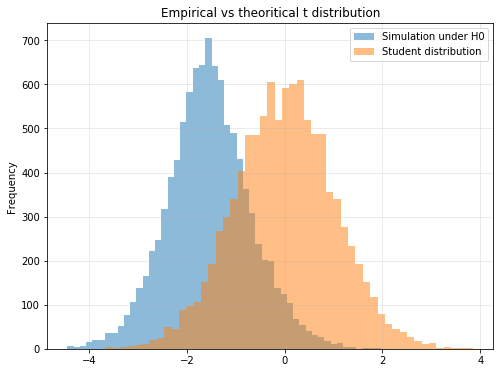

In [6]:
plt.figure(figsize=(8,6))
plt.hist(t_value, bins=50, alpha=0.5, label="Simulation under H0")
plt.hist(simul_t, bins=50, alpha=0.5, label="Student distribution")
plt.ylabel('Frequency')
plt.title('Empirical vs theoritical t distribution')
plt.legend(loc='upper right')
plt.grid(alpha=0.3)
plt.show()

### 3.

In [7]:
critical_values = np.array([np.percentile(t_value, 0.01), np.percentile(t_value, 0.05), np.percentile(t_value, 0.1)])

In [8]:
t_quantiles = stats.t(df=98).ppf((0.01, 0.05, 0.1))

In [9]:
Fuller = np.array([-3.51, -2.89, -2.58])

In [10]:
pd.DataFrame(np.array([critical_values, t_quantiles, Fuller]), index = ['Empirical t-value', 't distr.', 'Fuller'], columns = ['1%', '5%', '10%'])

,1%,5%,10%
Empirical t-value,-4.436586,-4.364332,-4.16349
t distr.,-2.365002,-1.660551,-1.29025
Fuller,-3.510000,-2.890000,-2.58000


## Testing Non-stationarity

In [11]:
# load the data
df = pd.read_excel('/Users/dantoni/HW11/data_monthly.xls')

In [12]:
index = ['DAX','FTALL' ,'S&P500']

# Compute Logarithm returns for each stock

LR = pd.DataFrame(np.log(df.iloc[1:,:].values / df.iloc[0:-1,:].values),  columns = index)

In [13]:
# Errors simulation in order to compute the new critical quantile with 300 data

simul2 = np.random.normal(0, 1, (300, 10000))

In [14]:
# Compute the series based on the null hypothesis

Y2 = np.ones((300, 10000))
for j in range(0,10000):
    for i in range(0,300):
        if i < 1:
            Y2[i, j] = 0 + simul2[i,j]
        else:
            Y2[i, j] = Y2[i-1, j] + simul2[i,j]
            
# Quicker method:            
# for j in range(0,10000):
#     Y[:, j] = np.cumsum(simul[:, 0])

In [15]:
# Store the t-values in an array

t_value2 = np.ones(10000)
delta_Y2 = Y2[1:,:] - Y2[:-1, :]

for i in range(0, 10000):
    variables2 = Y2[:-1,i].reshape(299, 1)
    x2 = sm.add_constant(variables2)
    y2 = delta_Y2[:, i]

    reg2 = sm.OLS(endog = y2, exog = x2, missing = 'drop')
    results2 = reg2.fit()
    t_value2[i] = results2.tvalues[1]

In [16]:
# Compute the t-value for each series of data (PRICE)

t_value3 = np.ones(3)
delta_price = df.values[1:,:] - df.values[:-1, :]

for i in range(0, 3):
    variables3 = df.values[:-1,i]
    x3 = sm.add_constant(variables3)
    y3 = delta_price[:, i]

    reg3 = sm.OLS(endog = y3, exog = x3, missing = 'drop')
    results3 = reg3.fit()
    t_value3[i] = results3.tvalues[1]

In [17]:
# Compute the t-value for each series of dataset (LOG RETURNS)

t_value4 = np.ones(3)
delta_LR = LR.values[1:,:] - LR.values[:-1, :]

for i in range(0, 3):
    variables4 = LR.values[:-1,i]
    x4 = sm.add_constant(variables4)
    y4 = delta_LR[:, i]

    reg4 = sm.OLS(endog = y4, exog = x4, missing = 'drop')
    results4 = reg4.fit()
    t_value4[i] = results4.tvalues[1]

In [18]:
critical_values2 = np.array([np.percentile(t_value2, 0.01), np.percentile(t_value2, 0.05), np.percentile(t_value2, 0.1)])

In [19]:
# Critical values estimated from the serie based on the null hypothesis
print('Critical quantile at 5%: ', critical_values2[1])
print()
print('t-value for each dataset (PRICE): ', t_value3)

Critical quantile at 5%:  -4.169068635484845

t-value for each dataset (PRICE):  [-1.04868001 -0.9936131  -0.23293973]


The empirical quantile at 5% estimated on simulation is around -4.2 (depending of the set seed). Based on this value, all 3 t-values from each dataset (price) are above this value meaning that there is no evidence to reject H0 (No stationarity).

In [20]:
# Critical values estimated from the serie based on the null hypothesis
print('Critical quantile at 5%: ', critical_values2[1])
print()
print('t-value for each dataset (RETURN): ', t_value4)

Critical quantile at 5%:  -4.169068635484845

t-value for each dataset (RETURN):  [-16.60833743 -17.1860506  -16.99837835]


The empirical quantile at 5% estimated on simulation is around -4.2 (depending of the set seed). Based on this value, all 3 t-values from each dataset (returns) are far below this value meaning that there is evidence to reject H0 (No stationarity).